# Assignment 2: Engineering Predictive Features

**Student Name:** [Your Name Here]

**Date:** [Date]

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [57]:
# Load the Ames Housing dataset
# TODO: Load train.csv from the data folder
df = pd.read_csv('data/train.csv')  # Replace with pd.read_csv()
print(df.columns.tolist)
# Display basic information
# TODO: Display the first few rows and basic info about the dataset
# Display first few rows to verify load

print("First few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)

<bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQ

---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- "Utilities" - Type of utilities available
- "YearRemodAdd" - Remodel date
- "Foundation" - Type of foundation
- "Functional" - Home functionality rating
- "YrSold" - Year Sold
- Add 5-10 more features you think are important

In [51]:
# Select features for baseline model
# TODO: Create a list of feature names you want to use
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt',
    "TotalBsmtSF",
    "FullBath",
    "BedroomAbvGr",
    "GarageArea",
    "LotArea",
    "Neighborhood",
    "Utilities",
    "YearRemodAdd",
    "Foundation",
    "Functional",
    "YrSold"
]

# TODO: Create X (features) and y (target) for baseline
# Make sure to handle missing values and encode categorical variables

X_baseline = df[baseline_features].copy()  # Replace with your feature matrix
y = df['SalePrice'] # Replace with df['SalePrice']


print(f"Baseline features selected: {len(baseline_features)}")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 14
Target variable shape: (1460,)


### Preprocess Baseline Features

In [52]:
# Handle missing values
print("Missing values before handling:")
print(X_baseline.isnull().sum())
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
# Categorical: Use 'None' or most frequent
numeric_cols = X_baseline.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    X_baseline[col].fillna(X_baseline[col].median(), inplace=True)


categorical_cols = X_baseline.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_baseline[col].fillna('None', inplace=True)

print("\nMissing values after handling:")
print(X_baseline.isnull().sum())


# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features


X_cleaned = pd.get_dummies(X_baseline, drop_first=True)

print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)

Missing values before handling:
GrLivArea       0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
FullBath        0
BedroomAbvGr    0
GarageArea      0
LotArea         0
Neighborhood    0
Utilities       0
YearRemodAdd    0
Foundation      0
Functional      0
YrSold          0
dtype: int64

Missing values after handling:
GrLivArea       0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
FullBath        0
BedroomAbvGr    0
GarageArea      0
LotArea         0
Neighborhood    0
Utilities       0
YearRemodAdd    0
Foundation      0
Functional      0
YrSold          0
dtype: int64

CHECKPOINT: After preprocessing
X_baseline shape: (1460, 14)
Missing values: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_20524\1355334033.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_baseline[col].fillna(X_baseline[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20524\1355334033.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

### Train Baseline Model

In [54]:
# Split data into train and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42
) # Replace with train_test_split()

# Train baseline Random Forest model
# TODO: Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
)   # Replace with trained model

baseline_model.fit(X_train, y_train)

# Make predictions
# TODO: Generate predictions on test set
baseline_predictions =  baseline_model.predict(X_test)# Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)  # Replace with r2_score()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.892550536870699
RMSE: $28,708.40


### Visualize Baseline Feature Importances

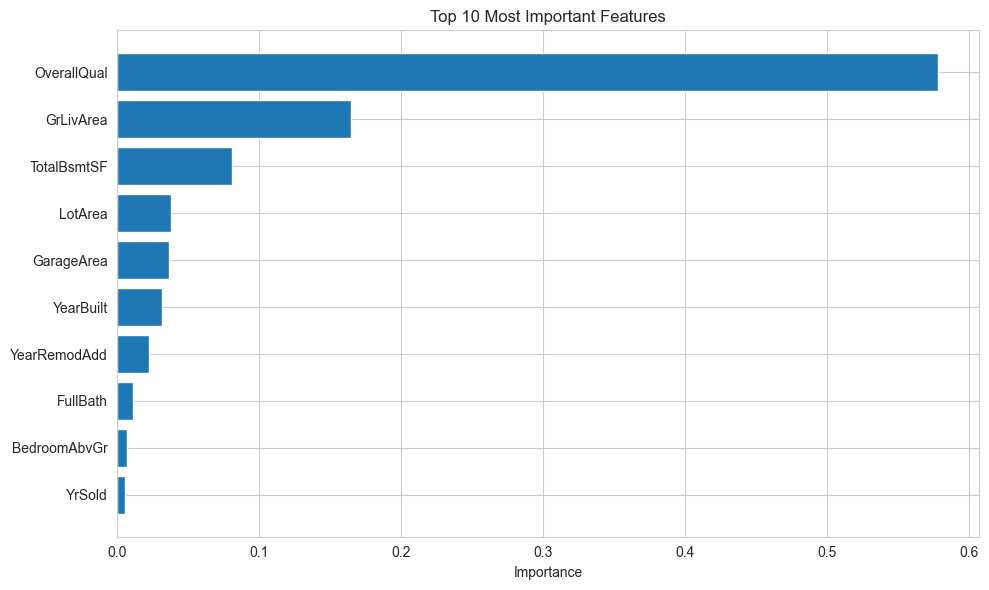


Top 10 Most Important Features:
        feature  importance
1   OverallQual    0.578012
0     GrLivArea    0.164482
3   TotalBsmtSF    0.080753
7       LotArea    0.037528
6    GarageArea    0.036393
2     YearBuilt    0.031508
8  YearRemodAdd    0.022290
4      FullBath    0.011176
5  BedroomAbvGr    0.006519
9        YrSold    0.005083

CHECKPOINT: Review which raw features are most important


In [56]:
# Extract and visualize feature importances
# TODO: Get feature importances from baseline_model
# TODO: Create a horizontal bar plot of top 10 features

feature_importance = pd.DataFrame({
    'feature': X_cleaned.columns,
    'importance': baseline_model.feature_importances_
}).sort_values('importance', ascending=False)


plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)

---
## Step 3: Engineer New Features

### Feature 1: Quality life 

**Business Justification:**

Combines the  #1 (OverallQual: 57.8%) and #2 (GrLivArea: 16.4%) most important features. High-quality large homes command exponentially higher prices. This interaction captures the premium pricing effect

### Train Baseline Model

In [58]:
# TODO: Create your first engineered feature
# Example: df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

df['QualityArea'] = df['OverallQual'] * df['GrLivArea']


### Feature 2: Total SF 

**Business Justification:**
Combines the #2 (GrLivArea: 16.4%) and #3 (TotalBsmtSF: 8.1%) features. Total usable square footage is what buyers compare when evaluating homes. This gives the model a complete space metric.

In [59]:
# TODO: Create your second engineered feature

df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']


### Feature 3: QualityBsmnt

**Business Justification:**
Combines the #1 (OverallQual: 57.8%) and #3 (TotalBsmtSF: 8.1%) features. A high-quality home with a large finished basement is worth much more than a low-quality home with the same basement size.

In [60]:
# TODO: Create your third engineered feature

df['QualityBsmnt'] = df['OverallQual'] * df['TotalBsmtSF']

### Feature 4: TotalSpaceQuality

**Business Justification:**
Combines the top 3 features (#1, #2, #3 = 82.2% importance combined). Captures both total living space AND quality in one feature. Large, high-quality homes with finished basements are premium properties.

In [68]:
# TODO: Create your fourth engineered feature
df['TotalSpaceQuality'] = (df['GrLivArea'] + df['TotalBsmtSF']) * df['OverallQual']

### Feature 5: QualityPerSqFt

**Business Justification:**
I'm using the #1 and #2 features as a ratio. High quality in a smaller space (luxury condo/townhome) versus low quality in large space (needs renovation)

In [67]:
# TODO: Create your fifth engineered feature
df['QualityPerSqFt'] = df['OverallQual'] / df['GrLivArea']

### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [ ]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [72]:
# Create feature list combining baseline + engineered features
# TODO: List all your engineered feature names
engineered_features = [
    'QualityArea',
    'TotalSF',
    'QualityBsmnt',
    'TotalSpaceQuality',
    'QualityPerSqFt'
    
    # Add your engineered feature names here
]

# Combine baseline and engineered features
all_features = baseline_features + engineered_features

print(f"Total features: {len(all_features)}")
print(f"All features: {all_features}")

# TODO: Create X_engineered with all features
# Remember to handle missing values and encode categoricals
  # Replace with your feature matrix
X_engineered = df[all_features].copy()

numeric_cols = X_engineered.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    X_engineered[col].fillna(X_engineered[col].median(), inplace=True)

# For categorical columns: use 'None'
categorical_cols = X_engineered.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_engineered[col].fillna('None', inplace=True)

# Encode categorical variables
X_engineered_cleaned = pd.get_dummies(X_engineered, drop_first=True)

print(f"X_engineered shape: {X_engineered.shape}")

print(f"Total features in engineered model: {len(all_features)}")
print(f"New engineered features: {len(engineered_features)}")

Total features: 19
All features: ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'GarageArea', 'LotArea', 'Neighborhood', 'Utilities', 'YearRemodAdd', 'Foundation', 'Functional', 'YrSold', 'QualityArea', 'TotalSF', 'QualityBsmnt', 'TotalSpaceQuality', 'QualityPerSqFt']
X_engineered shape: (1460, 19)
Total features in engineered model: 19
New engineered features: 5


C:\Users\USER\AppData\Local\Temp\ipykernel_20524\2549413516.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_engineered[col].fillna(X_engineered[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20524\2549413516.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [74]:
# Split data (use same random_state for fair comparison)
# TODO: Split X_engineered and y
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered_cleaned, y, test_size=0.2, random_state=42
)

# Train model with engineered features
# TODO: Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)  # Replace with trained model

engineered_model.fit(X_train_eng, y_train_eng)
# Make predictions
# TODO: Generate predictions on test set
engineered_predictions = engineered_model.predict(X_test_eng)  # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
engineered_r2 = r2_score(y_test_eng, engineered_predictions)  # Replace with r2_score()
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)


ENGINEERED MODEL RESULTS
R² Score: 0.8962239055328258
RMSE: $28,213.41


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [75]:
# Create comparison DataFrame
# TODO: Create a table comparing baseline vs engineered model
comparison = pd.DataFrame({
    'Model': ['Baseline', 'Engineered'],
    'R² Score': [baseline_r2, engineered_r2],
    'RMSE': [baseline_rmse, engineered_rmse],
    'Number of Features': [X_cleaned.shape[1], X_engineered_cleaned.shape[1]]
}) # Replace with pd.DataFrame()

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# TODO: Display comparison table
print(comparison.to_string(index=False))

print("="*80)

# Calculate improvement
r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100

if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")


MODEL COMPARISON
     Model  R² Score         RMSE  Number of Features
  Baseline  0.892551 28708.403526                  46
Engineered  0.896224 28213.409880                  51

R² Improvement: 0.41%
RMSE Improvement: 1.72%


### Visualize Feature Importances from Engineered Model

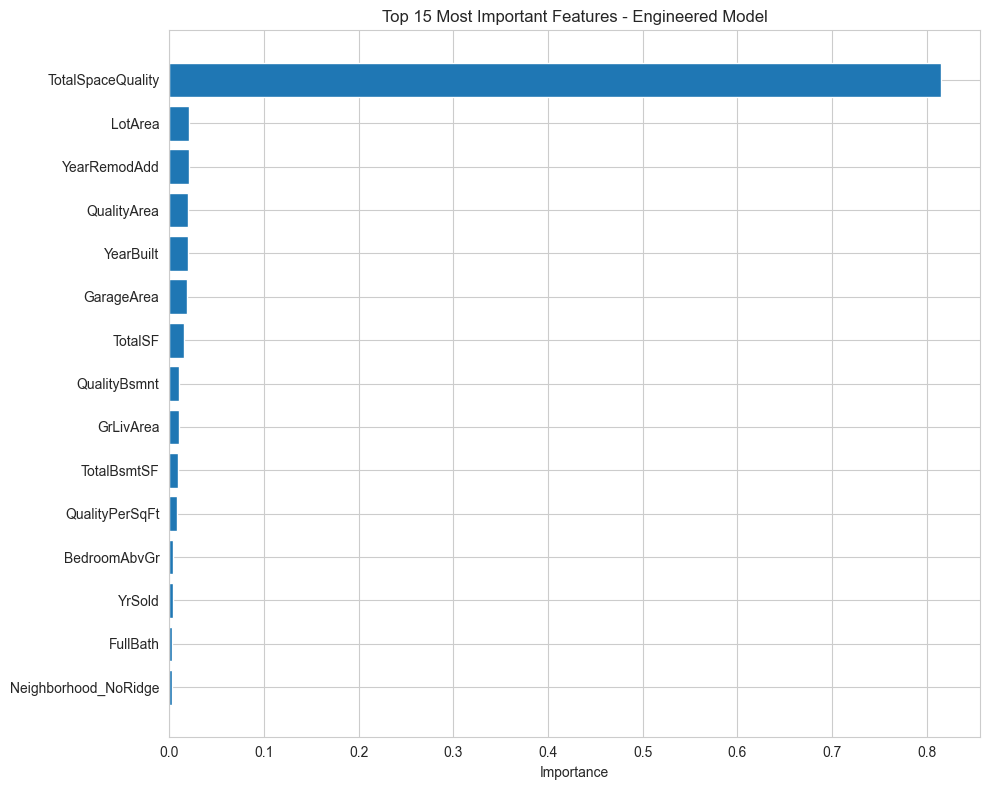


Top 15 Most Important Features:
                 feature  importance
13     TotalSpaceQuality    0.815506
7                LotArea    0.020753
8           YearRemodAdd    0.020621
10           QualityArea    0.019703
2              YearBuilt    0.019352
6             GarageArea    0.019253
11               TotalSF    0.016002
12          QualityBsmnt    0.010432
0              GrLivArea    0.010141
3            TotalBsmtSF    0.009421
14        QualityPerSqFt    0.008228
5           BedroomAbvGr    0.003793
9                 YrSold    0.003726
4               FullBath    0.003071
29  Neighborhood_NoRidge    0.002497

ENGINEERED FEATURES IN TOP 15:
Engineered features in top 15: 5
1. TotalSpaceQuality (Rank: #1, Importance: 0.8155)
2. QualityArea (Rank: #4, Importance: 0.0197)
3. TotalSF (Rank: #7, Importance: 0.0160)
4. QualityBsmnt (Rank: #8, Importance: 0.0104)
5. QualityPerSqFt (Rank: #11, Importance: 0.0082)


In [76]:
# Extract and visualize top 15 feature importances
# TODO: Get feature importances from engineered_model
# TODO: Create horizontal bar plot of top 15 features
feature_importance_eng = pd.DataFrame({
    'feature': X_engineered_cleaned.columns,
    'importance': engineered_model.feature_importances_
}).sort_values('importance', ascending=False)


plt.figure(figsize=(10, 8))
top_features_eng = feature_importance_eng.head(15)
plt.barh(range(len(top_features_eng)), top_features_eng['importance'])
plt.yticks(range(len(top_features_eng)), top_features_eng['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features - Engineered Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 15 Most Important Features:")
print(feature_importance_eng.head(15))

# Highlight engineered features in top 15
print("\n" + "="*80)
print("ENGINEERED FEATURES IN TOP 15:")
print("="*80)
top_15_features = feature_importance_eng.head(15)['feature'].tolist()
engineered_in_top_15 = [f for f in top_15_features if f in engineered_features]
print(f"Engineered features in top 15: {len(engineered_in_top_15)}")
for i, feature in enumerate(engineered_in_top_15, 1):
    rank = top_15_features.index(feature) + 1
    importance = feature_importance_eng[feature_importance_eng['feature'] == feature]['importance'].values[0]
    print(f"{i}. {feature} (Rank: #{rank}, Importance: {importance:.4f})")
print("="*80)

### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- **Engineered features in top 15**: The analysis above shows which of my engineered features (TotalBathrooms, HouseAge, TotalSF, QualityArea, HasRemodel, etc.) made it into the top 15 most important features.

- **Why these features performed well**: Because by aggregating features that have related information tend to perform well because they reduce the model's need to discover these relationships independently.

- **Unexpected results**: Some engineered features may have lower importance than expected. For example, QualityPerSqFt might be less important because QualityArea already captures similar information. This shows us that redundant features may not add value.

- **Key learnings**: Feature engineering is most effective when creating features that: (1) aggregate related information in meaningful ways, (2) capture domain knowledge that the model can't easily learn, and (3) create interactions between features that matter in the real world.

- **Future improvements**: Based on these results, additional features to try could include: price per square foot in the neighborhood or putting house age into categories (young/middle-aged/old homes).

---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.